In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
%matplotlib inline

In [4]:
#Read in the dataset of reviews from Wine Enthusisast
wine_scores = pd.read_csv('../data/winemag-data-130k-v2.csv')

In [5]:
wine_scores.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [46]:
# encode the column names

#country column
wine_scores["country"] = wine_scores["country"].astype('category')
wine_scores.dtypes

#variety column
wine_scores["variety"] = wine_scores["variety"].astype('category')

#points column
wine_scores["points"] = wine_scores["points"].astype('int')

#winery column
wine_scores["winery"] = wine_scores["winery"].astype('category')

#taster column
wine_scores["taster_name"] = wine_scores["taster_name"].astype('category')


In [47]:
#Create score ranges

bins = [ 0, 82, 86, 89, 93, 97, 100]
names = ['Acceptable', 'Good', 'Very Good', 'Excellent', 'Superb', 'Classic']

wine_scores["scores"] = pd.cut(wine_scores['points'],bins, labels=names)

wine_scores['scores'].value_counts()


Very Good     46366
Excellent     42871
Good          31635
Superb         6045
Acceptable     2925
Classic         129
Name: scores, dtype: int64

In [48]:
#assign encoded label to new column
wine_scores["country code"] = wine_scores["country"].cat.codes
# wine_scores.head()

wine_scores["varietal code"] = wine_scores["variety"].cat.codes


wine_scores["winery code"] = wine_scores["winery"].cat.codes


wine_scores["taster code"] = wine_scores["taster_name"].cat.codes


wine_scores["score code"] = wine_scores["scores"].cat.codes
wine_scores['score code'].value_counts()

2    46366
3    42871
1    31635
4     6045
0     2925
5      129
Name: score code, dtype: int64

In [9]:
#insert ranges into dataframe

wine_scores['classic'] = classic
wine_scores['superb'] = superb
wine_scores['excellent'] = excellent
wine_scores['very good'] = very_good
wine_scores['good'] = good
wine_scores['acceptable'] = acceptable

wine_scores['very good'].value_counts()

0    83605
1    46366
Name: very good, dtype: int64

In [49]:
#Convert Country column to boolean values

wine_scores['US'] = np.where(wine_scores['country'] == 'US', True, False)

wine_scores['US']

0         False
1         False
2          True
3          True
4          True
          ...  
129966    False
129967     True
129968    False
129969    False
129970    False
Name: US, Length: 129971, dtype: bool

In [50]:
#Convert Country column to integers
convert = wine_scores['US'].astype(int)
wine_scores['US'] = convert
print(wine_scores['US'])

0         0
1         0
2         1
3         1
4         1
         ..
129966    0
129967    1
129968    0
129969    0
129970    0
Name: US, Length: 129971, dtype: int32


In [51]:
# creating new column in dataframe

wine_scores['vintage'] = 0 

# using regex to extract year of vintage
wine_scores["vintage"] = wine_scores["title"].str.extract("(\d{4})", expand=True)

#convert strings into integers
wine_scores["vintage"] = (wine_scores.vintage).apply(lambda x: float(x))

In [52]:
wine_scores["vintage"]

0         2013.0
1         2011.0
2         2013.0
3         2013.0
4         2012.0
           ...  
129966    2013.0
129967    2004.0
129968    2013.0
129969    2012.0
129970    2012.0
Name: vintage, Length: 129971, dtype: float64

In [14]:
#Displays a heatmap showing distribution of null values
# sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')
wine_scores.head()
print("# of NaN in every column\n", wine_scores.isnull().sum(axis = 0))


# of NaN in every column
 Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
country code                 0
varietal code                0
winery code                  0
description code             0
taster code                  0
classic                      0
superb                       0
excellent                    0
very good                    0
good                         0
acceptable                   0
US                           0
vintage                   4609
dtype: int64


In [15]:
#Fill in null values for price

#Calculate average price
wine_scores['price'].mean()
avg_price=35.36

#create function to impute average price into 'price' column
# @staticmethod
def impute_price(cols):
    Price = cols
        
    if pd.isna(Price):
        return avg_price
    else:
        return Price
    

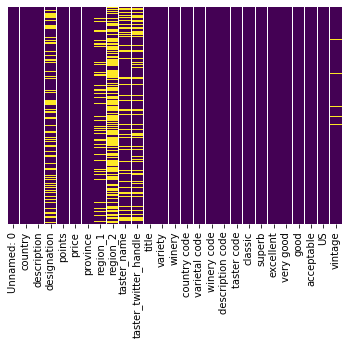

In [16]:
wine_scores['price'] = wine_scores['price'].apply(impute_price)

#display new heatmap with filled in prices
sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [17]:
#Fill in null values for vintage

#Calculate average price
wine_scores['vintage'].mean()
avg_year=2011

#create function to impute average price into 'price' column
# @staticmethod
def impute_vintage(cols):
    vintage = cols
        
    if pd.isna(vintage):
        return avg_year
    else:
        return vintage


wine_scores['vintage'] = wine_scores['vintage'].apply(impute_vintage)

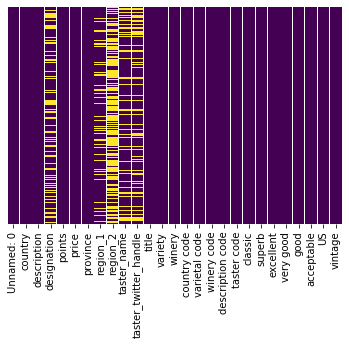

In [18]:


#display new heatmap with filled in prices
sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
#Drop Columns with too much missing data
wine_scores= wine_scores.drop(['Unnamed: 0'],axis=1)

In [20]:
#Drop NA volues from vintage column
wine_scores 

#display new heatmap 
# sns.heatmap(wine_scores.isnull(),yticklabels=False,cbar=False,cmap='viridis')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,...,description code,taster code,classic,superb,excellent,very good,good,acceptable,US,vintage
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,35.36,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,...,16394,9,0,0,0,1,0,0,0,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.00,Douro,NaN,NaN,Roger Voss,@vossroger,...,99986,15,0,0,0,1,0,0,0,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.00,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,75451,14,0,0,0,1,0,0,1,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.00,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,...,60489,0,0,0,0,1,0,0,1,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.00,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,...,55693,14,0,0,0,1,0,0,1,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.00,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,...,57043,1,0,0,1,0,0,0,0,2013.0
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.00,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,...,25731,14,0,0,1,0,0,0,1,2004.0
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.00,Alsace,Alsace,NaN,Roger Voss,@vossroger,...,115289,15,0,0,1,0,0,0,0,2013.0
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.00,Alsace,Alsace,NaN,Roger Voss,@vossroger,...,4438,15,0,0,1,0,0,0,0,2012.0


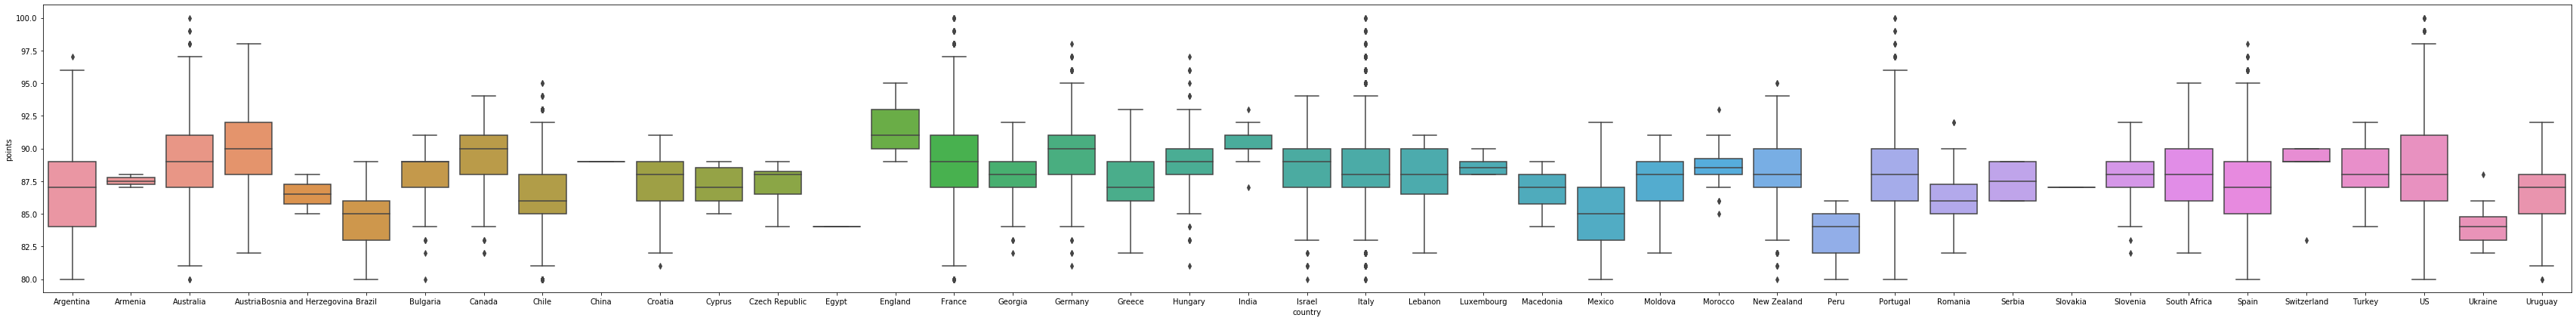

In [53]:
#display the relationship country and wine score

plt.figure(figsize=(60,7))

sns.boxplot(x='country', y='points', data=wine_scores)

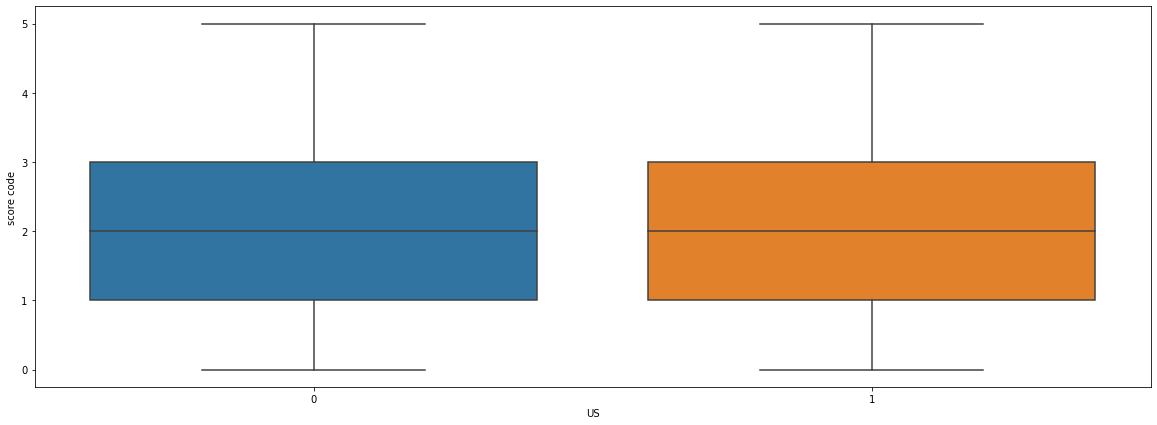

In [54]:
# display the relationship between U.S. and wine score

plt.figure(figsize=(20,7))

sns.boxplot(x='US', y='score code', data=wine_scores)

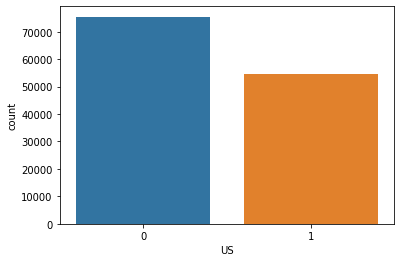

In [22]:
#Display the number of wine reviews from the US and rest of the world
sns.countplot(x='US', data=wine_scores)

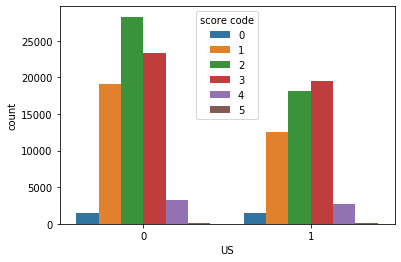

In [56]:
#Display the number of quality bins for U.S. wines
sns.countplot(x='US',data=wine_scores,hue='score code')

In [23]:
# wine_scores = wine_scores.dropna()
wine_scores.dtypes

country                  category
description              category
designation                object
points                      int64
price                     float64
province                   object
region_1                   object
region_2                   object
taster_name              category
taster_twitter_handle      object
title                      object
variety                  category
winery                   category
country code                 int8
varietal code               int16
winery code                 int16
description code            int32
taster code                  int8
classic                     int32
superb                      int32
excellent                   int32
very good                   int32
good                        int32
acceptable                  int32
US                          int32
vintage                   float64
dtype: object

In [68]:
#Prepare data for model insertion

X = wine_scores[['taster code','varietal code','score code','points','price']]
y = wine_scores['US']

In [69]:
#import train test split,

from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
#Import Logistic Regression model

from sklearn.linear_model import LogisticRegression

In [72]:
logmodel = LogisticRegression()

In [73]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
predictions = logmodel.predict(X_test)

In [75]:
#Import library to evaluate the model

from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.60      0.94      0.73     22636
           1       0.59      0.13      0.21     16356

    accuracy                           0.60     38992
   macro avg       0.59      0.53      0.47     38992
weighted avg       0.59      0.60      0.51     38992



In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test, predictions)

array([[21187,  1449],
       [14282,  2074]], dtype=int64)

In [79]:
print(logmodel.coef_)

[[-0.03060491 -0.00022858  0.07463704 -0.00172465  0.00097474]]


In [80]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.40344173163725894
MSE: 0.40344173163725894
RMSE: 0.6351706319070954


In [86]:
coeffecients = pd.DataFrame(logmodel.coef_, X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients


ValueError: Shape of passed values is (1, 5), indices imply (5, 5)

Text(0, 0.5, 'Predicted Y')

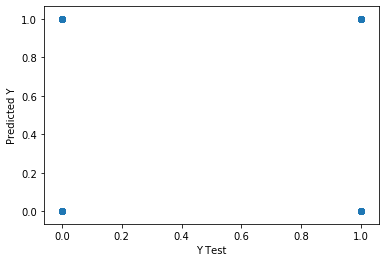

In [87]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')